In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()
cancer.keys()

print(cancer['feature_names'])
print(cancer['target_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0, test_size=0.2, stratify=cancer['target'])

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.svm import SVC         
svm = SVC()
svm.fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(svm.score(X_test_scaled, y_test)))


Training set score: 0.987
Test set score: 0.956


In [6]:
from sklearn.preprocessing import StandardScaler
std_scaler=  StandardScaler()
X_train_scaled= std_scaler.fit_transform(X_train)
X_test_scaled= std_scaler.transform(X_test)   

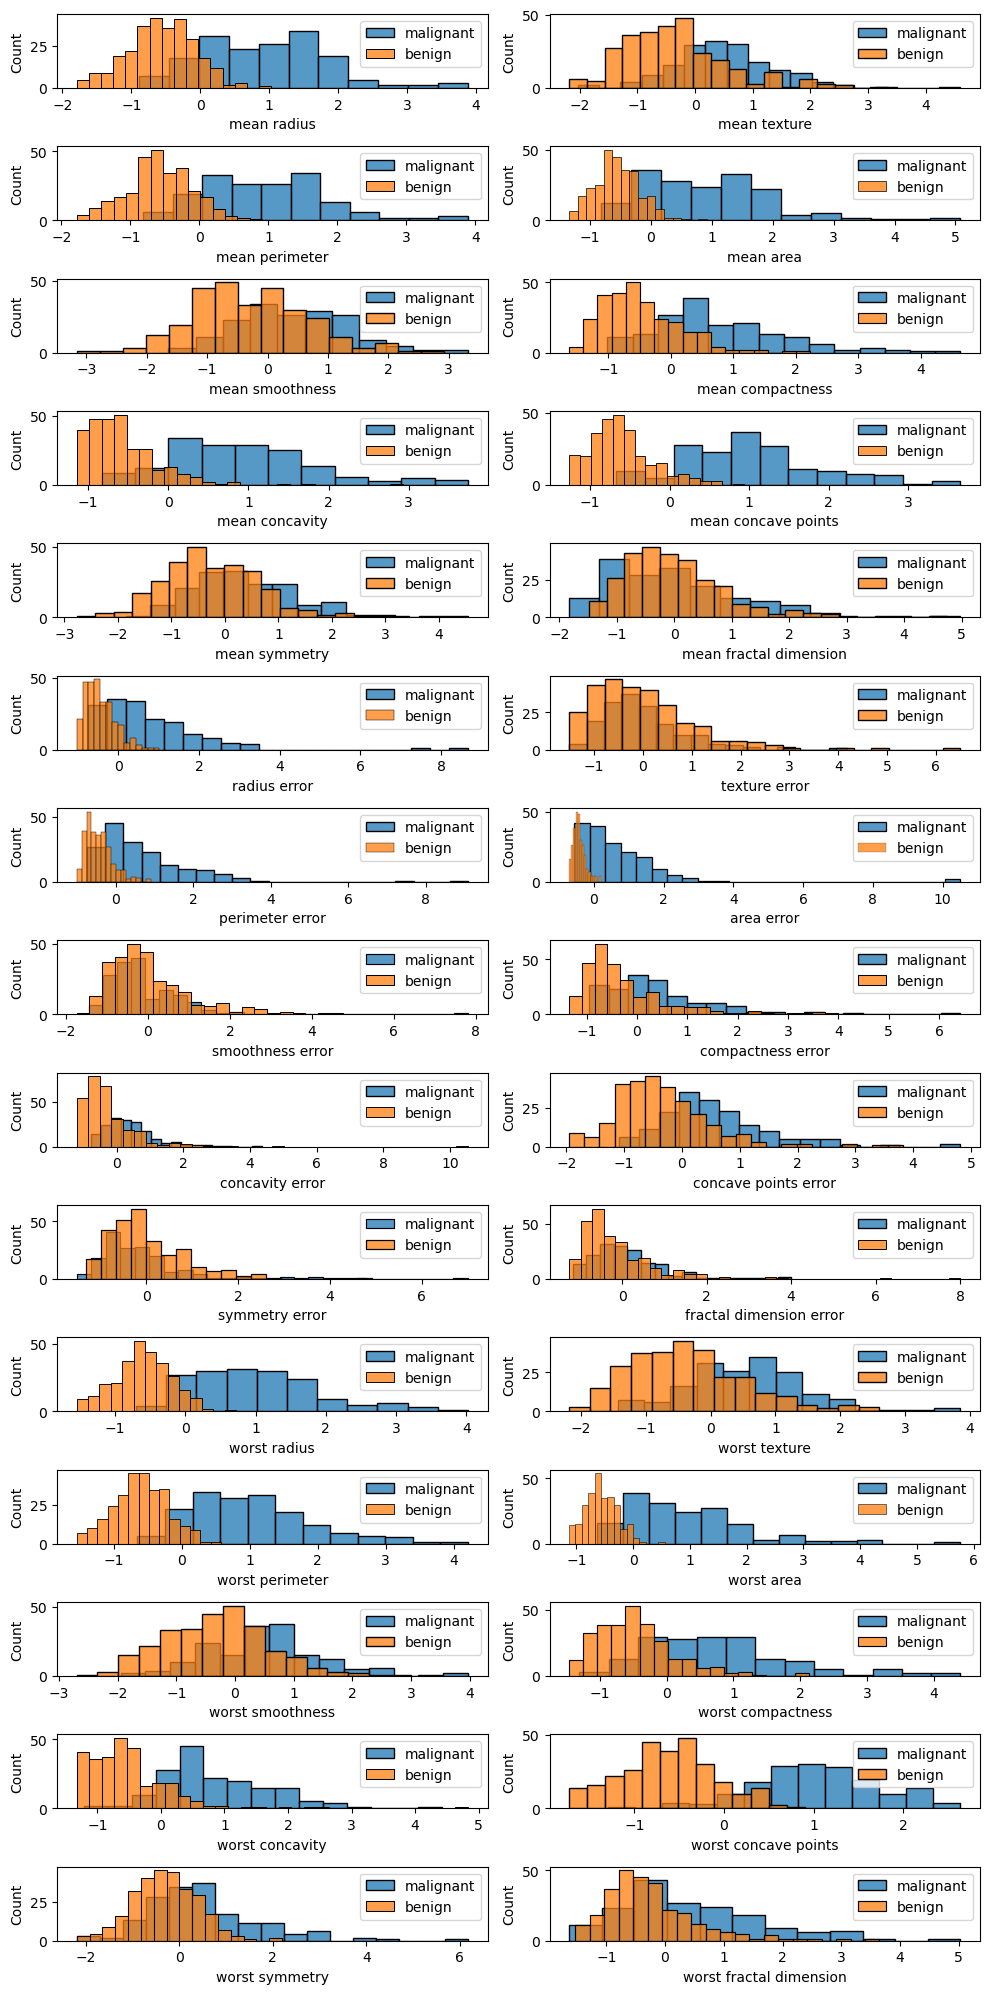

In [7]:
fig, ax= plt.subplots(15, 2, figsize=(10,20))
for col, ax in zip(cancer['feature_names'], ax.flatten()):
    sns.histplot(X_train_scaled[:, cancer['feature_names'].tolist().index(col)][y_train==0], ax=ax, label=cancer['target_names'][0])
    sns.histplot(X_train_scaled[:, cancer['feature_names'].tolist().index(col)][y_train==1], ax=ax, label=cancer['target_names'][1])
    ax.set_xlabel(col)
    ax.legend()
plt.tight_layout()
plt.show()

    

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [9]:
pca.components_

array([[ 0.22197555,  0.10703739,  0.22996438,  0.22325488,  0.1364266 ,
         0.2384532 ,  0.25996956,  0.25987934,  0.13057635,  0.05397071,
         0.20421889,  0.01105318,  0.20983199,  0.20038454,  0.00630117,
         0.16691295,  0.16149049,  0.18767641,  0.03932519,  0.10276195,
         0.23128223,  0.1072548 ,  0.23936479,  0.22724473,  0.12037063,
         0.2097245 ,  0.22827178,  0.25155424,  0.12034239,  0.12803972],
       [-0.22636784, -0.04182544, -0.20850133, -0.22570633,  0.19470913,
         0.15710032,  0.04695963, -0.03604822,  0.20415206,  0.36697169,
        -0.11651384,  0.07263558, -0.09758454, -0.15768745,  0.20105807,
         0.23082433,  0.17723727,  0.10337601,  0.18961962,  0.27754899,
        -0.20911332, -0.02802037, -0.18963661, -0.21088599,  0.19395583,
         0.1575106 ,  0.09767841, -0.00142758,  0.17420796,  0.28433805]])

In [10]:
X_train_pca.shape

(455, 2)

<Axes: >

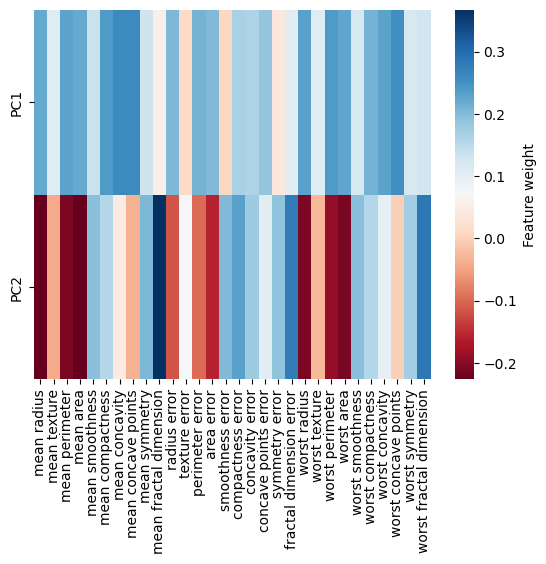

In [11]:
sns.heatmap(pca.components_, cmap= "RdBu", yticklabels=['PC1', 'PC2'], xticklabels=cancer['feature_names'], cbar_kws={'label': 'Feature weight'})

In [12]:
from sklearn.datasets import fetch_lfw_people
faces= fetch_lfw_people(min_faces_per_person=20, resize=0.7)
print(faces.target_names)
print(faces.images.shape)

['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi' 'Tiger Woods' 'Tom Das

In [13]:
print(faces.images[0].shape)

(87, 65)


In [14]:
pd.DataFrame({"names": faces.target_names, 
              "counts": pd.Series(faces.target).value_counts().sort_index()}).sort_values("counts", ascending=False).head(40)

,names,counts
14,George W Bush,530
10,Colin Powell,236
58,Tony Blair,144
12,Donald Rumsfeld,121
15,Gerhard Schroeder,109
5,Ariel Sharon,77
21,Hugo Chavez,71
35,Junichiro Koizumi,60
25,Jean Chretien,55
31,John Ashcroft,53


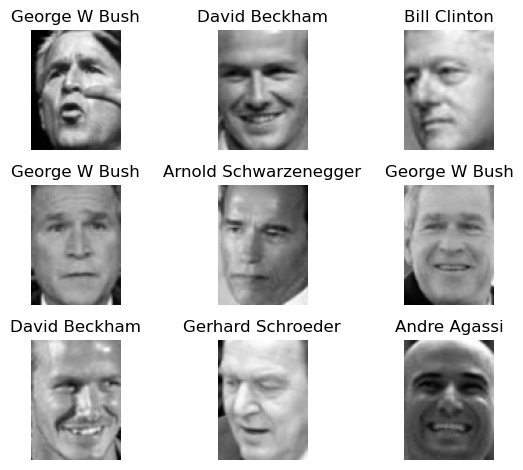

In [15]:
fig, ax= plt.subplots(3, 3)
for target_id, image_id, ax in zip(np.random.randint(0, 20, size=9), np.random.randint(0, 20, size=9), ax.flatten()):
    ax.imshow(faces.images[faces.target== target_id][image_id], cmap= 'gray')
    ax.set_title(faces.target_names[target_id])
    ax.axis('off')
plt.tight_layout()

In [16]:
df_faces_target= pd.DataFrame(faces.target, columns=['target'])

In [17]:
df_faces_target.reset_index(names= "index", inplace=True)

In [18]:
df_faces_target_grouped= df_faces_target.groupby('target')

In [19]:
selected_faces_indices= []
for group in df_faces_target_grouped.groups.values():
    if len(group) >= 50:
        selected_faces_indices.extend(group[:50].tolist())
    else:
        selected_faces_indices.extend(group.tolist())



In [20]:
selected_images= []
for index in selected_faces_indices:
    selected_images.append(faces.data[index])
selected_images= np.array(selected_images)

In [21]:
selected_targets= faces.target[selected_faces_indices]


In [22]:
y= selected_targets
X= selected_images

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

In [24]:
# scaler= StandardScaler()
# X_train_scaled= scaler.fit_transform(X_train)
# X_test_scaled= scaler.transform(X_test)

In [25]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test_scaled, y_test)))

Training set score: 1.000
Test set score: 0.232


In [27]:
pca = PCA(n_components= 50, whiten= True, random_state=23)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
knn_pca = KNeighborsClassifier(n_neighbors= 1)
knn_pca.fit(X_train_pca, y_train)
print("Training set score PCA: {:.3f}".format(knn_pca.score(X_train_pca, y_train)))
print("Test set score PCA: {:.3f}".format(knn_pca.score(X_test_pca, y_test)))

Training set score PCA: 1.000
Test set score PCA: 0.332


In [28]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
knn_nmf = KNeighborsClassifier(n_neighbors= 1)
knn_nmf.fit(X_train_nmf, y_train)
print("Training set score NMF: {:.3f}".format(knn_nmf.score(X_train_nmf, y_train)))
print("Test set score NMF: {:.3f}".format(knn_nmf.score(X_test_nmf, y_test)))   

/Users/macbookair/opt/anaconda3/envs/geo_env/lib/python3.13/site-packages/sklearn/decomposition/_nmf.py:1728: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Training set score NMF: 1.000
Test set score NMF: 0.104


In [29]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [30]:
pca = PCA(n_components= 50, whiten= True, random_state=23)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [31]:
from sklearn.cluster import DBSCAN      
dbscan = DBSCAN(eps= 40.0, min_samples= 3)
dbscan.fit(X_train_pca)
labels = dbscan.labels_
print("Number of clusters found: {}".format(len(set(labels)) - (1 if -1 in labels else 0))) 

Number of clusters found: 1


In [32]:
dbscan = DBSCAN(eps= 15, min_samples= 3)
labels= dbscan.fit_predict(X_train_pca)
np.unique(labels)


array([0])

In [33]:
from sklearn.cluster import KMeans
n_clusters = 10
# extract clusters with k-Means
km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_train_pca)
print("cluster sizes k-Means: %s" % np.bincount(labels_km))

cluster sizes k-Means: [293 194  69 184  89  96 141 312 122 150]


In [34]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_train_pca)
print("cluster sizes agglomerative clustering: %s" % np.bincount(labels_agg))

cluster sizes agglomerative clustering: [177 172 106 173 186  59 256  33 410  78]


In [35]:
scaler= StandardScaler()
cancer_scaled= scaler.fit_transform(cancer['data'])

In [36]:
k_means= KMeans(n_clusters=2, random_state=0)
k_means.fit(cancer_scaled)
print("Cluster labels:\n", k_means.labels_) 


Cluster labels:
 [1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0

In [37]:
k_means_labels= []
for l in k_means.labels_:
    if l==0:
        k_means_labels.append(1)
    else:
        k_means_labels.append(0)

In [38]:
np.mean(cancer["target"] == k_means_labels)

np.float64(0.9121265377855887)

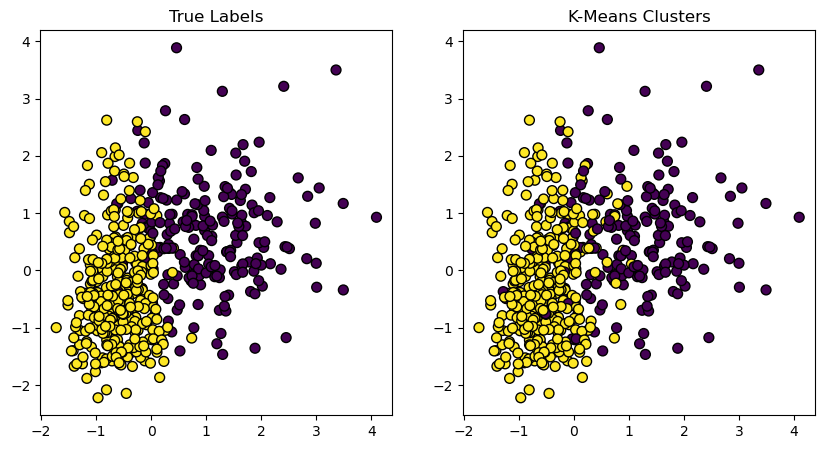

In [47]:
fig, ax= plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(cancer_scaled[:,20], cancer_scaled[:,21], c= cancer["target"], cmap= 'viridis', edgecolor='k', s=50)
ax[0].set_title("True Labels")
ax[1].scatter(cancer_scaled[:,20], cancer_scaled[:,21], c= k_means_labels, cmap= 'viridis', edgecolor='k', s=50)
ax[1].set_title("K-Means Clusters")
plt.show()


In [40]:
agglomerative_clustering= AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(cancer_scaled)
agglomerative_labels= agglomerative_clustering.labels_
print("Agglomerative Clustering labels:\n", agglomerative_labels)

Agglomerative Clustering labels:
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1
 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1

In [41]:
np.mean(cancer["target"] == agglomerative_clustering.labels_)

np.float64(0.8804920913884007)

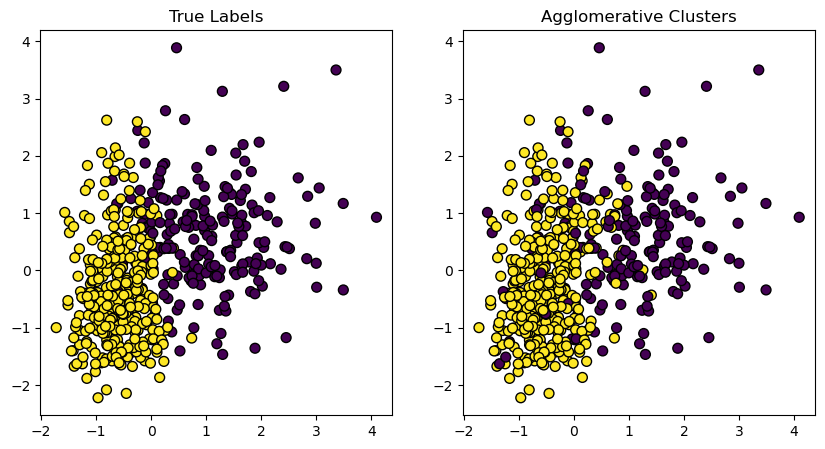

In [45]:
fig, ax= plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(cancer_scaled[:,20], cancer_scaled[:,21], c= cancer["target"], cmap= 'viridis', edgecolor='k', s=50)
ax[0].set_title("True Labels")
ax[1].scatter(cancer_scaled[:,20], cancer_scaled[:,21], c= agglomerative_clustering.labels_, cmap= 'viridis', edgecolor='k', s=50)
ax[1].set_title("Agglomerative Clusters")
plt.show() 